<a href="https://colab.research.google.com/github/pedrolucas167/modelo_preditivo_temperatura_tensorflow/blob/main/conversao_celsius_fahrenheit_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Preditivo com Redes Neurais - TensorFlow no Google Colab

## Objetivo
Criar um modelo preditivo usando redes neurais com TensorFlow para converter temperaturas de Celsius para Fahrenheit.

## Introdução
Neste projeto, ao invés de utilizar a fórmula conhecida de conversão F = C * 1.8 + 32, utilizaremos Machine Learning para treinar um modelo que aprenda essa relação a partir dos dados.


In [ ]:
# Importando bibliotecas necessárias
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Dados de Treinamento
Os dados utilizados para treinar o modelo são pares de temperaturas conhecidas em Celsius e seus equivalentes em Fahrenheit.

In [ ]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46.4, 59, 71.6, 100], dtype=float)

## Construção do Modelo
Criei um modelo sequencial com uma camada densa que tem apenas um neurônio, adequado para um problema simples de regressão como este.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Treinamento do Modelo
O modelo é treinado por 500 épocas para minimizar o erro entre as previsões e os valores reais.

In [ ]:
# Treinamento do modelo
history = model.fit(celsius, fahrenheit, epochs=500, verbose=False)


## Estatísticas do Treinamento
Abaixo, um gráfico relacionando as épocas de treinamento com o valor da função de perda (loss), que indica o quão bom o modelo está ficando.

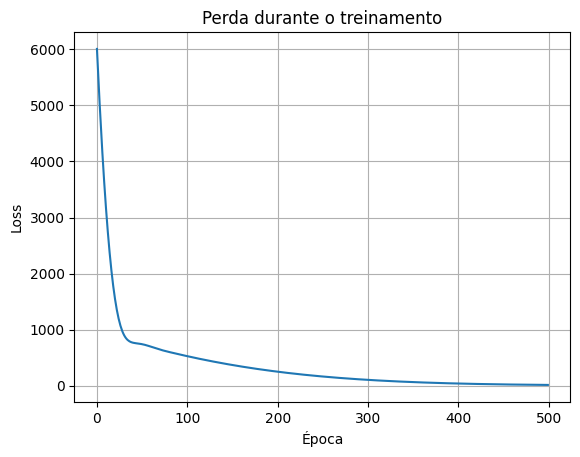

In [ ]:
import matplotlib.pyplot as plt


%matplotlib inline

if 'loss' in history.history:
    plt.plot(history.history['loss'])
    plt.title('Perda durante o treinamento')
    plt.xlabel('Época')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()
else:
    print("Histórico de perda ('loss') não encontrado. Verifique o treinamento do modelo.")


## Teste com Novos Valores
Testamos o modelo com 10 novos valores de temperatura em Celsius e comparamos os resultados com os valores reais calculados com a fórmula tradicional.

In [ ]:
celsius_test = np.array([-30, -5, 5, 10, 20, 25, 30, 35, 40, 50], dtype=float)
predicted_fahrenheit = model.predict(celsius_test)
real_fahrenheit = celsius_test * 1.8 + 32

df = pd.DataFrame({
    'Celsius': celsius_test,
    'Fahrenheit (Real)': real_fahrenheit,
    'Fahrenheit (Modelo)': predicted_fahrenheit.flatten()
})

print(df.round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
   Celsius  Fahrenheit (Real)  Fahrenheit (Modelo)
0    -30.0              -22.0           -26.110001
1     -5.0               23.0            19.520000
2      5.0               41.0            37.770000
3     10.0               50.0            46.889999
4     20.0               68.0            65.139999
5     25.0               77.0            74.269997
6     30.0               86.0            83.400002
7     35.0               95.0            92.519997
8     40.0              104.0           101.650002
9     50.0              122.0           119.900002
